In [1]:
import os

from src.load_data import load_matches
from src.offball_wrappers import a_obr_per_subtype,a_obr_per_subtype_per_phase, a_obr_per_subtype_per_team, a_obr_per_subtype_per_player, obr_xthreat 
from src.density_change import a_ddc_distance_player, metric_ddc
from src.space_creation import metric_sc
from src.tracking_functions import find_frame_start_end, get_player_coordinates, get_opp_team_players_coordinates, get_team_players_coordinates

## IMPORTANT
The probability that a goal will be scored 10 seconds after a player is successfully served a pass.
If the player was not targeted by a pass, it is calculated at the passing moment. <-- This is the way they say how good a runner is or the effect that he has. However, this only refers if he receives the pass. But a lot of move form midfielders is not to receive the ball but to generate space or create passing options. Thats why we are doing this.!!!!

-----------------------------------------------------------------------------------------------------


2. Quadrant talent map
Make a 2D scatter:

x‑axis: space_creation per run (or per90).

y‑axis: defensive_density_change per run (or per90).

Color or size points by number of runs per90. Then define quadrants:

Top‑right: “elite space finders” – create space and get free a lot.

Top‑left: “pressure escapists” – get free but don’t open much space behind.

Bottom‑right: “space openers for others” – create space where they were but stay more marked.

Bottom‑left: low impact movers.

This is a very clear talent‑ID picture: look for young/underused players in the top‑right with decent volume.

-----------------------------------------------------------------------------------------------------

Also do violin plots for the thirds phases

-----------------------------------------------------------------------------------------------------

Use these type of runs for space_created (and maybe def density change too): BUILD UP RUNS

The others are more in line with xthreat if they receive the ball: PROGRESSION AND DIRECT RUNS

AND AMAZING EXEMPLE OF SPACE CREATED Plotting event ID: 1_91, Player ID: 11117, Subtype: coming_short, Plotting event ID: 1_102, Player ID: 11117, Subtype: coming_short

-----------------------------------------------------------------------------------------------------

Do something with pushing defensive line in run in behind runs. Maybe scatter plot of pushing defensive line and if his run is a real passing option and the size of the circle is how many runs. or idk but it could be interesting if we can quantify if these run in behind runs are worth it (they push the defensive line and create space).

-----------------------------------------------------------------------------------------------------

In [2]:
# load matches
data_path = os.path.join(os.getcwd(), "src/data")
all_tracking, dynamic_events_all, all_metadata = load_matches(data_path)

c:\Users\g4a4b\OneDrive - University of Twente\SportsAnalyticsProject\analytics_cup_research\src\load_data.py:56: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  de_match = pd.read_csv(url)
c:\Users\g4a4b\OneDrive - University of Twente\SportsAnalyticsProject\analytics_cup_research\src\load_data.py:56: DtypeWarning: Columns (276) have mixed types. Specify dtype option on import or set low_memory=False.
  de_match = pd.read_csv(url)


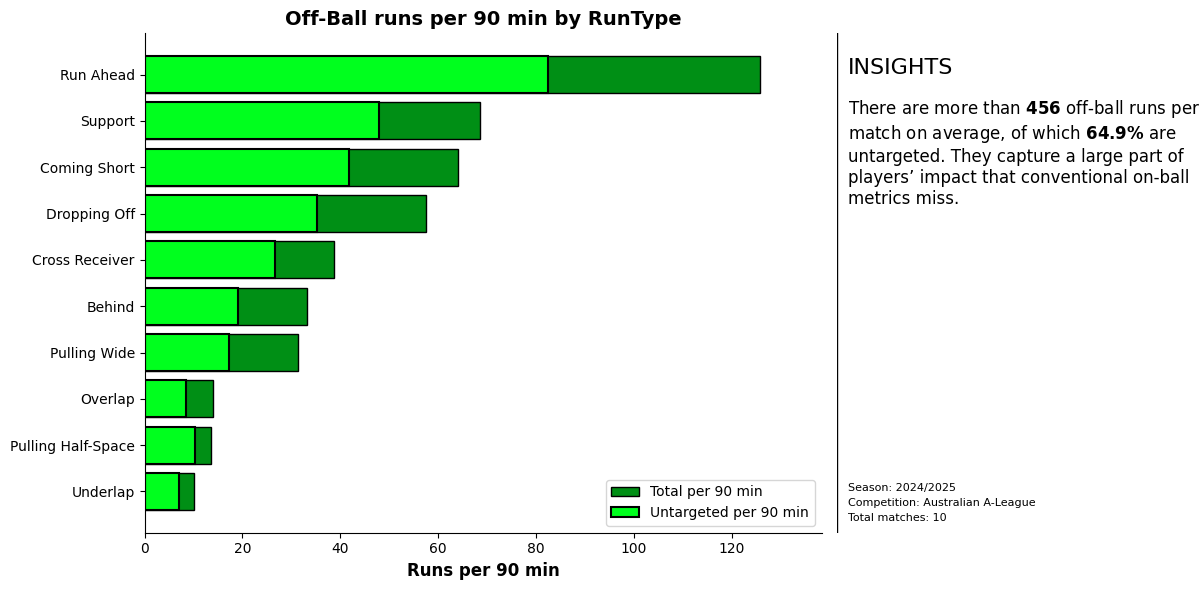

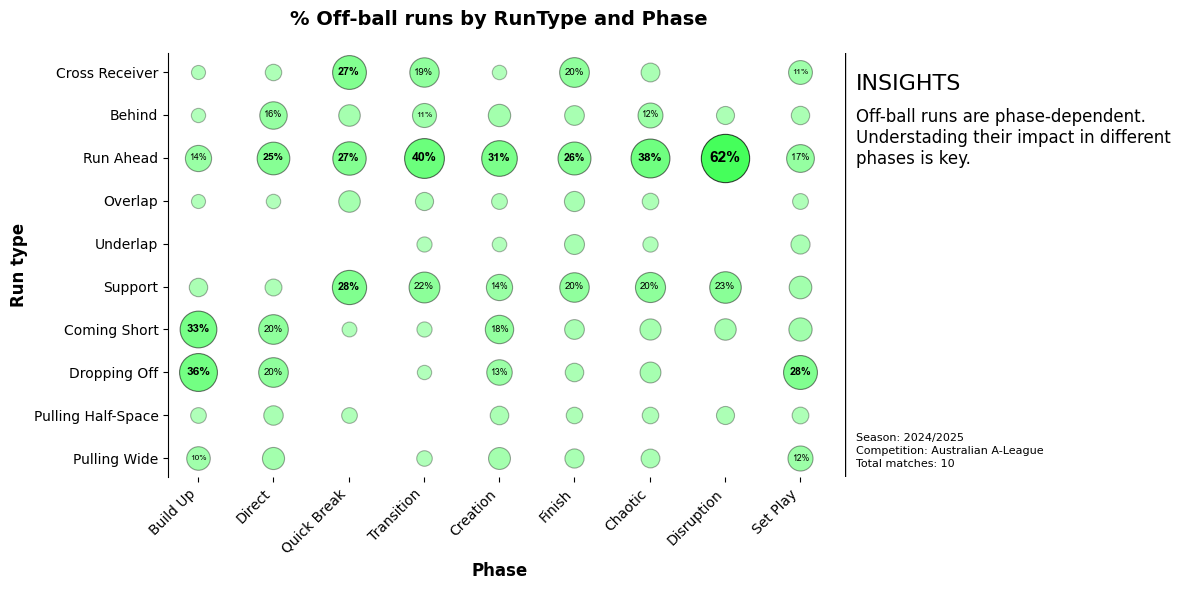

In [3]:
# analysis of off ball runs per 90 minutes
a_obr_per_subtype(all_tracking,dynamic_events_all)

# analysis of off ball runs per subtype per phase
a_obr_per_subtype_per_phase(dynamic_events_all)

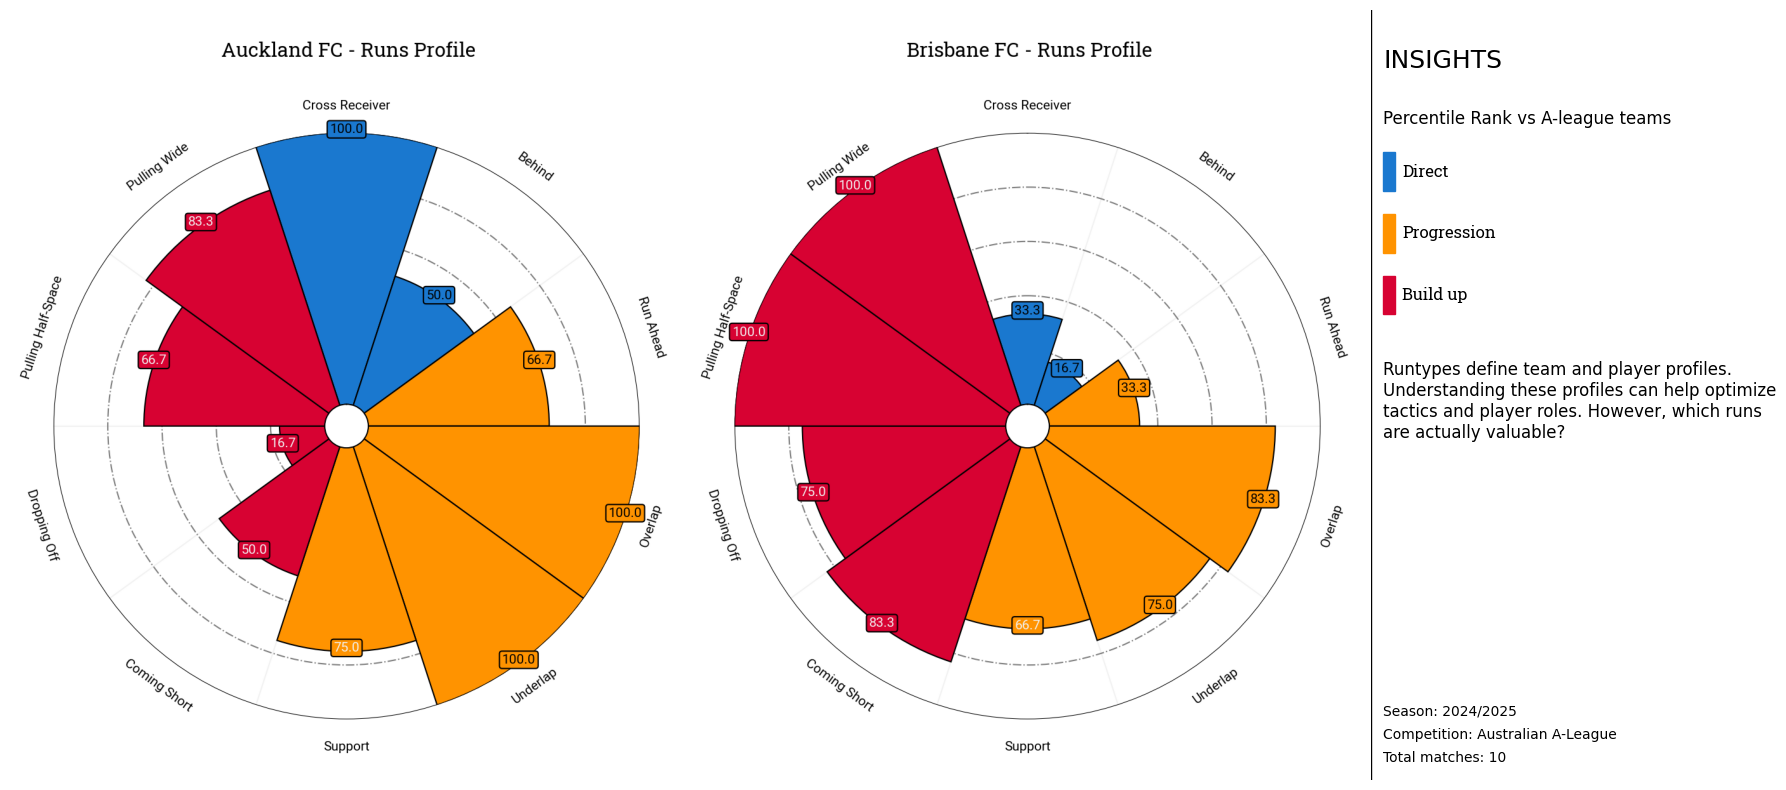

In [4]:
# analysis of off ball runs per subtype per team per 90 minutes
a_obr_per_subtype_per_team(all_tracking, dynamic_events_all, teams_shortnames=["Auckland FC", "Brisbane FC"])

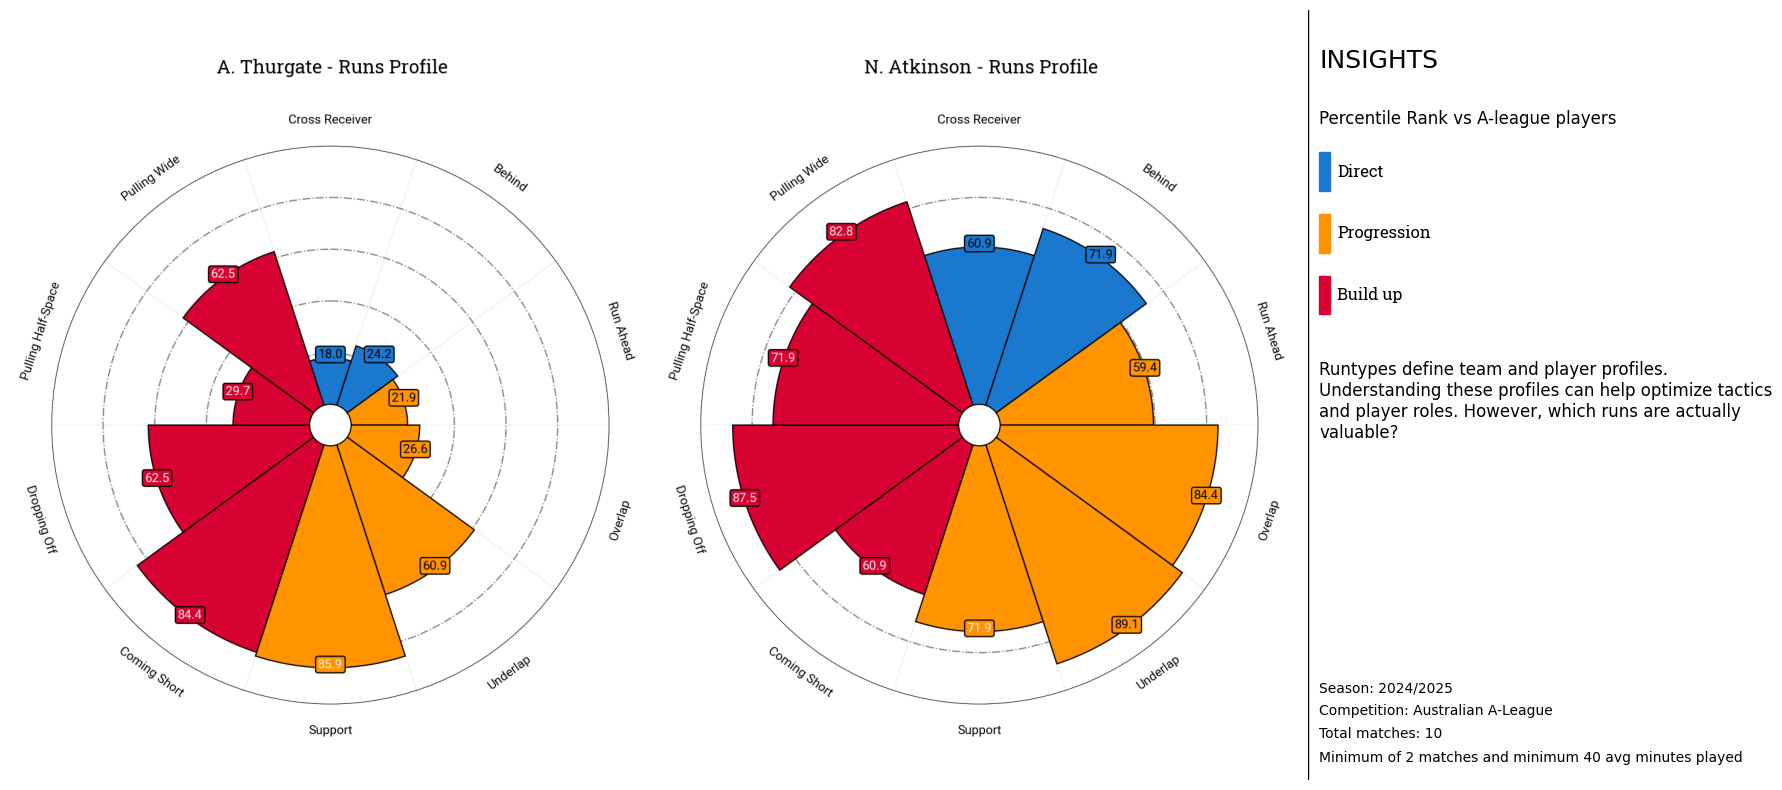

In [5]:
# analysis of off ball runs per subtype per player per 90 minutes
a_obr_per_subtype_per_player(all_metadata, dynamic_events_all, players_names = ["A. Thurgate", "N. Atkinson"], min_matches=2, min_avg_minutes_played=40)


Midfielders rank second in how evenly their off‑ball runs are spread across different run types, very close to forwards, while still accounting for a substantial share of all runs. Combined with the available physical aggregation data for this position group, this makes midfielders a natural choice for a deeper analysis of how off‑ball movement creates space and passing options.

Number of events to process for defensive density change: 691
Number of events after cleaning for defensive density change: 674


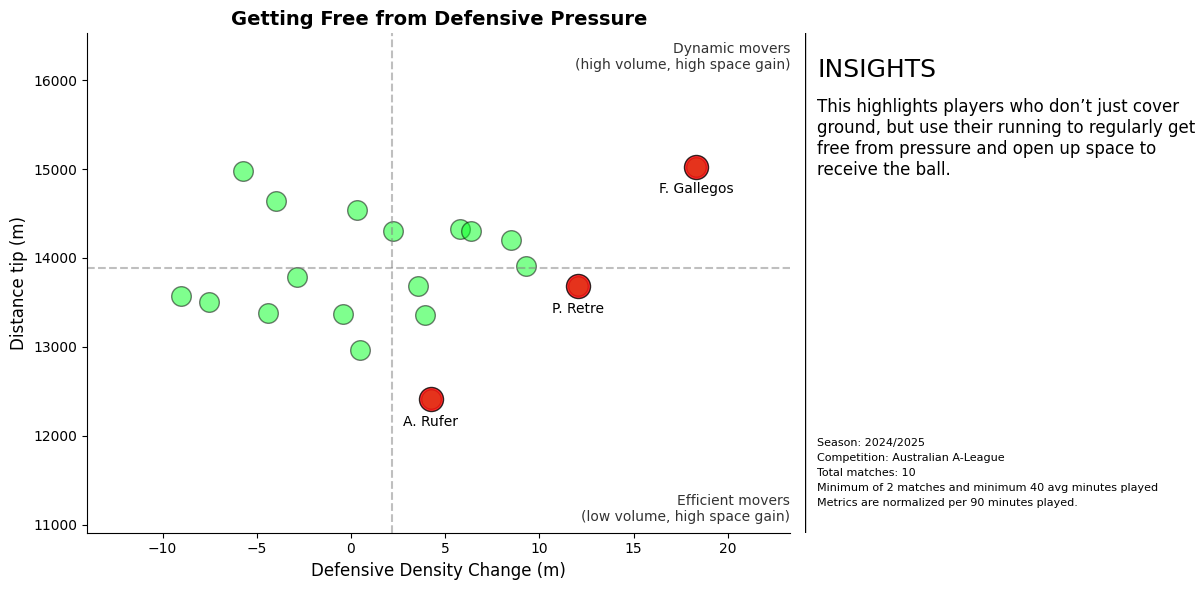

In [3]:
a_ddc_distance_player(dynamic_events_all, all_tracking, all_metadata, data_path, min_matches=2, min_avg_minutes_played=40)

In [7]:
mid_obr_grouped, mid_obr_merged = metric_sc(dynamic_events_all, all_tracking, all_metadata, min_matches=2, min_avg_minutes_played=40)

Number of events after filtering for Build Up Runs: 304
Number of events to process for space created: 298
Number of events after processing for space created: 291
Number of events after calculating space created for Build Up Runs: 291
Number of events after removing outliers for space created: 256


In [10]:
print(mid_obr_grouped)

    player_id  space_created  total_minutes  space_created_per90min
0       11117     -74.119849         183.18              -36.416565
1       14736    -251.871782         317.33              -71.434974
2       23418     182.432783         328.12               50.039469
3       26969     -38.007287         159.53              -21.442085
4       27003      16.854431         143.01               10.606942
5       50951     -67.614118         219.39              -27.737229
6       50992     186.252893         197.47               84.887630
7       51015     -34.508417         199.67              -15.554452
8       51045     226.291452         190.65              106.825233
9       51046     -42.081065          88.17              -42.954473
10      51675    -388.904057         180.31             -194.117714
11      51681    -156.308366         120.48             -116.764218
12     104563    -312.603263         197.47             -142.473762
13     133854     -62.906151         121.18     

In [15]:
df_offball_xthreat = obr_xthreat(dynamic_events_all, all_metadata, min_matches=2, min_avg_minutes_played=40)

In [3]:
mid_obr_ddc, mid_obr_ddc_third = metric_ddc(dynamic_events_all, all_tracking, all_metadata, min_matches=2, min_avg_minutes_played=40)

Number of events to process for defensive density change: 691
Number of events after cleaning for defensive density change: 674


In [4]:
print(mid_obr_ddc)
print(mid_obr_ddc_third)

    player_id  def_density_change  total_minutes  def_density_change_per90min
0       11117            8.048803         183.18                     3.954538
1       14736          -20.271363         317.33                    -5.749292
2       23418           66.787226         328.12                    18.319061
3       26969           -0.779258         159.53                    -0.439624
4       27003           -4.514506         143.01                    -2.841099
5       50951            8.636346         219.39                     3.542874
6       50992           13.922816         197.47                     6.345538
7       51015            9.387409         199.67                     4.231316
8       51045           19.685080         190.65                     9.292721
9       51046           11.793372          88.17                    12.038148
10      51675            4.488334         180.31                     2.240309
11      51681           -5.331862         120.48                

In [18]:
print(df_offball_xthreat[1])

    player_id        third_end  total_runs  xthreat  xpass_completion  \
0       11117  attacking_third          30   1.2940           17.9794   
1       11117  defensive_third           2   0.0029            1.2366   
2       11117     middle_third           8   0.0654            5.3186   
3       14736  attacking_third          12   0.2451            8.7861   
4       14736  defensive_third           3   0.0017            2.4556   
5       14736     middle_third          18   0.1090           14.6189   
6       23418  attacking_third          51   1.0848           38.1728   
7       23418  defensive_third           4   0.0183            2.3925   
8       23418     middle_third          17   0.2405           12.7592   
9       26969  attacking_third          10   0.8534            5.1845   
10      26969  defensive_third           3   0.0199            1.9200   
11      26969     middle_third           1   0.0024            0.8933   
12      27003  attacking_third           8   0.6387

<Axes: xlabel='third_end', ylabel='def_density_change_per90min'>

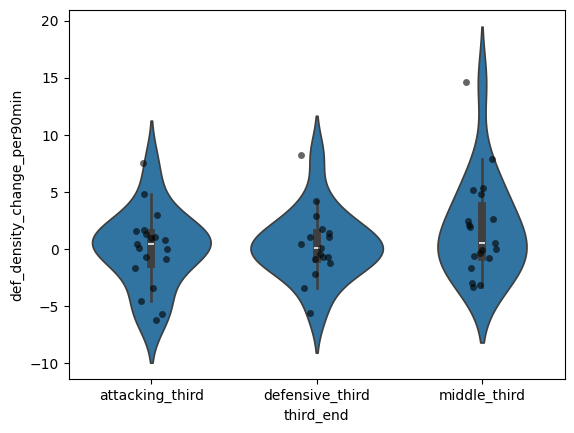

In [11]:
import seaborn as sns 
sns.violinplot( data=mid_obr_ddc_third, x="third_end", y="def_density_change_per90min" ) 
sns.stripplot( data=mid_obr_ddc_third, x="third_end", y="def_density_change_per90min", color="black", jitter=True, alpha=0.6 )

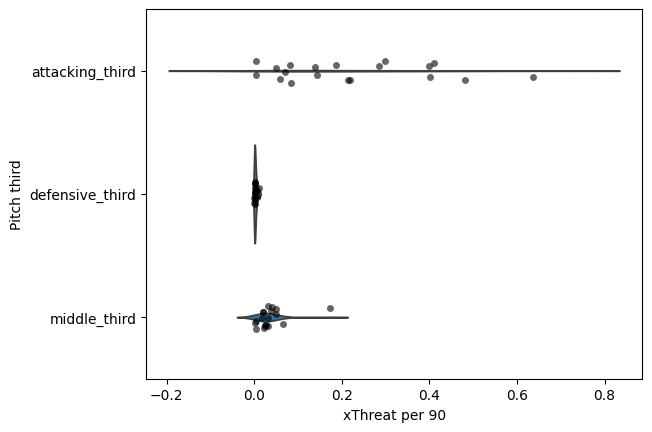

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(
    data=df_offball_xthreat[1],
    x="xthreat_per90",
    y="third_end",
    inner=None
)

sns.stripplot(
    data=df_offball_xthreat[1],
    x="xthreat_per90",
    y="third_end",
    color="black",
    jitter=True,
    alpha=0.6
)

plt.xlabel("xThreat per 90")
plt.ylabel("Pitch third")

plt.show()


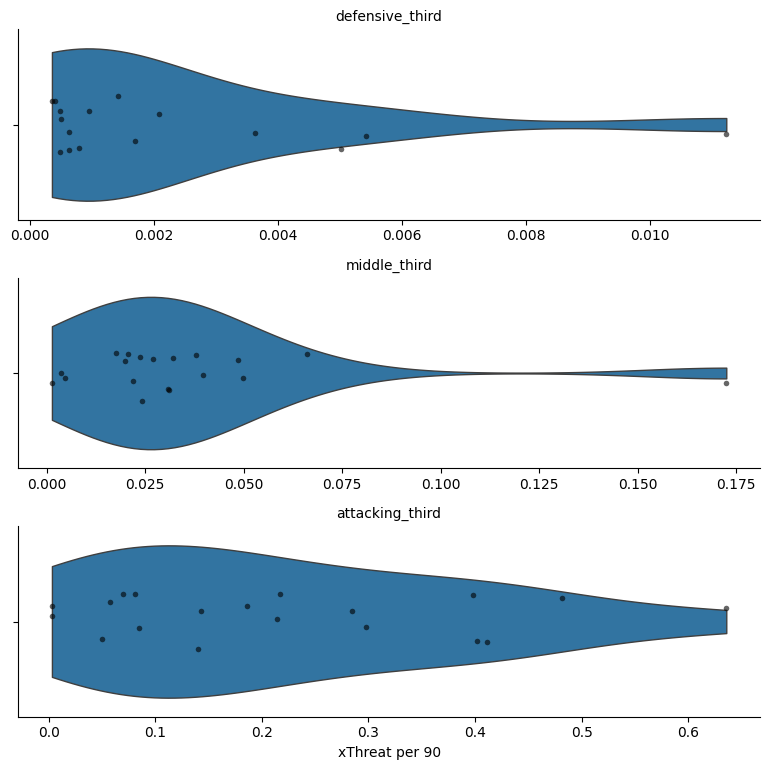

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: remove zeros if any (recommended for xThreat)
df_plot = df_offball_xthreat[1][df_offball_xthreat[1]["xthreat_per90"] > 0].copy()

# Ensure consistent ordering
third_order = ["defensive_third", "middle_third", "attacking_third"]

g = sns.FacetGrid(
    df_plot,
    row="third_end",
    row_order=third_order,
    sharex=False,
    height=2.6,
    aspect=3
)

# Violin
g.map_dataframe(
    sns.violinplot,
    x="xthreat_per90",
    inner=None,
    cut=0,
    linewidth=1
)

# Player points
g.map_dataframe(
    sns.stripplot,
    x="xthreat_per90",
    color="black",
    jitter=0.15,
    alpha=0.6,
    size=4
)

# Labels
g.set_axis_labels("xThreat per 90", "")
g.set_titles("{row_name}")

plt.tight_layout()
plt.show()
